In [1]:
using FileIO
using PyPlot
using LaTeXStrings
using MixedLayerModel

In [2]:
function profile(u, p, maxz)
    zi, hM, qM, SST = u;
    
    stepz = 1.0;
    z1 = collect(0:stepz:zi); z2 = collect(zi:stepz:maxz);
    z = [z1;z2];
    
    h = [hM .* ones(length(z1)); h_ft(z2, p)];
    qt = [qM .* ones(length(z1)); q_ft(z2, p)];
    
    θ = theta(z,h,qt); # K
    
    T = temp.(z,h,qt);
    ql = q_l(z,T,qt) * 1000.0; # kg/kg -> g/kg
    
    return z, θ, ql 
end

profile (generic function with 1 method)

Dict{String,Any}("LHF" => 90.52057229419358,"OHU" => 34.773466573683336,"we" => 0.006337770359691151,"RHsurf" => 0.6601029364602873,"code" => :Success,"zc" => 274.9281313791437,"SHF" => -6.0205895928557,"u0" => [1200.0, 313275.2385058754, 0.009649295402350162, 290.0],"ΔR" => 83.10470492657714,"zb" => 781.3691205978214,"uf" => [1056.297251976965, 312522.8811820538, 0.008294605636914835, 290.0],"du/u" => [-1.2451202172889757e-11, -1.234856039325708e-13, 5.6652141214224356e-12, 0.0],"p" => basic_params
  SST0: Float64 290.0
  CO2: Int64 400
  ΔR: Int64 80
  D: Float64 6.0e-6
  RHft: Float64 0.25
  Gamma_q: Float64 -3.0e-6
  sft0: Int64 297
  Gamma_s: Float64 0.005
  qft0: Float64 0.006708503509872937
  A: Float64 2.0
  RHsurf: Float64 0.8
  V: Float64 10.0
  CTh: Float64 0.0008
  CTq: Float64 0.0008
  LHF: Float64 90.0
  SHF: Float64 5.0
  Hw: Float64 1.0
  OHU: Float64 10.0
  etype: enBal enBal()
  ftype: varFlux varFlux()
  rtype: varRad varRad()
  stype: fixSST fixSST()
)
Dict{String,A

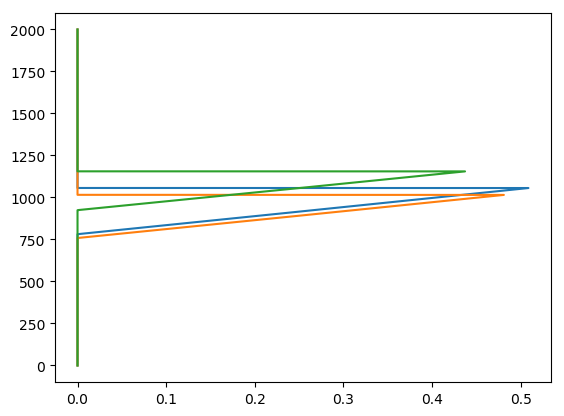

("LHF" => 114.8736638734861,"OHU" => 34.773466573683336,"we" => 0.006945657298230007,"RHsurf" => 0.6143946246169523,"code" => :Failure,"zc" => 230.9318852548572,"SHF" => -7.41871766428855,"u0" => [1056.297251976965, 312522.8811820538, 0.008294605636914835, 290.0],"ΔR" => 77.10659447889998,"zb" => 924.4230391815454,"uf" => [1155.3549244364026, 315719.95341146964, 0.008780286950817423, 291.82525234091173],"du/u" => [1.1708741033141697e-8, 6.391271768236694e-10, 2.0158419290081844e-9, 4.720065298017655e-10],"p" => basic_params
  SST0: Float64 290.0
  CO2: Float64 500.0
  ΔR: Int64 80
  D: Float64 6.0e-6
  RHft: Float64 0.25
  Gamma_q: Float64 -3.0e-6
  sft0: Int64 297
  Gamma_s: Float64 0.005
  qft0: Float64 0.006708503509872937
  A: Float64 2.0
  RHsurf: Float64 0.8
  V: Float64 10.0
  CTh: Float64 0.0008
  CTq: Float64 0.0008
  LHF: Float64 90.0
  SHF: Float64 5.0
  Hw: Int64 10
  OHU: Float64 34.773466573683336
  etype: enBal enBal()
  ftype: varFlux varFlux()
  rtype: varRad varRad()


In [6]:
#path = "../experiments/output/new_CO2_forcing_enBal/"
path = "../experiments/output/test_deep_ocean/"

o = load(path*"co2_400.jld2")
u = o["uf"];
println(o)
maxz = 2000;
p = o["p"];
z, θ, ql = profile(u, p, maxz);
plot(ql, z)

o = load(path*"co2_upstep_500_Hw100.jld2")
u = o["uf"];
println(o)
maxz = 2000;
p = o["p"];
z, θ, ql = profile(u, p, maxz);
plot(ql, z)

o = load(path*"co2_upstep_500_Hw10.jld2")
u = o["uf"];
println(o)
maxz = 2000;
p = o["p"];
z, θ, ql = profile(u, p, maxz);
plot(ql, z)

# o = load(path*"co2_upstep_fixSST_500.jld2")
# u = o["uf"];
# println(o)
# maxz = 2000;
# p = o["p"];
# z, θ, ql = profile(u, maxz);
# plot(ql, z)

In [14]:
path = "../experiments/output/enBal/";
out400 = load(path*"co2_400.jld2");

co2_vals = [500,600,700,800];
exps = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";
exps_fixSST = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";

out = load.(exps);
out_fixSST = load.(exps_fixSST);

pushfirst!(out, out400);
pushfirst!(out_fixSST, out400);
pushfirst!(co2_vals, 400);

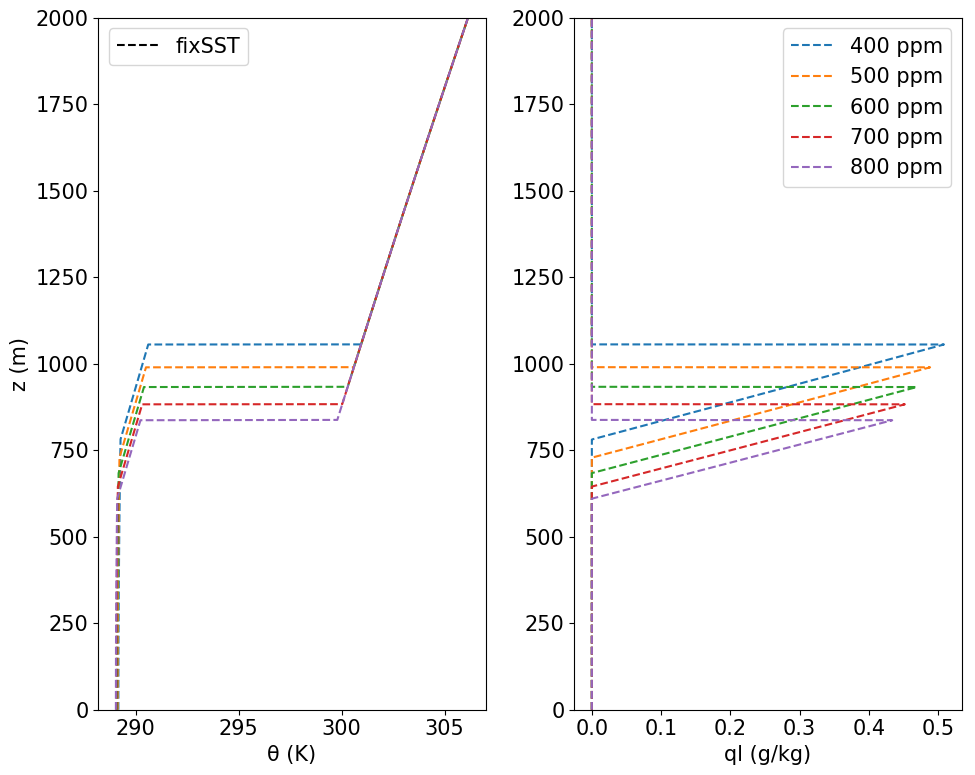

In [20]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig1 = figure(figsize=(10,8));
ax1 = subplot(121);
ax2 = subplot(122);

maxz = 2000;

for (i,co2i) in enumerate(co2_vals)
    col = "C"*string(i-1);
    
    outi = out[i];
    u = outi["uf"];
    p = outi["p"];
    z, θ, ql = profile(u, p, maxz);
    #ax1.plot(θ, z, color=col);
    #ax2.plot(ql, z, color=col, label=string(co2i)*" ppm");
    
    outi = out_fixSST[i];
    u = outi["uf"];
    p = outi["p"];
    z, θ, ql = profile(u, p, maxz);
    ax1.plot(θ, z, "--", color=col);
    ax2.plot(ql, z, "--", color=col, label=string(co2i)*" ppm");
end

#p1 = ax1.plot([290,300],[-10,-10],"k-",label="varSST")
p2 = ax1.plot([290,300],[-10,-10],"k--",label="fixSST")
ax1.legend();

ax1.set_ylim([0,maxz]); ax2.set_ylim([0,maxz]);
ax1.set_ylabel("z (m)");
ax1.set_xlabel("θ (K)"); ax2.set_xlabel("ql (g/kg)");
ax2.legend();

tight_layout();
savefig("./figures/profiles_by_co2.png",dpi=400)
show()